In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import trange, tqdm

from utils import get_label, get_multi_label, plot_roc, evaluate, Imputer, Vectorizer, Splitter
from models import WeightedLogisticRegression

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [13]:
def label_from_multi(y_multi):
    return torch.tensor([1 if y == 0 else 0 for y in y_multi]).float()

In [14]:
data = pd.read_csv("data/train.tsv", sep="\t")
x_all, y_all_multi = data.drop("label", axis=1), get_multi_label(data)
x_train, x_test, y_train_multi, y_test_multi = train_test_split(data.drop("label", axis=1), get_multi_label(data), random_state=RANDOM_SEED)
y_train = label_from_multi(y_train_multi)
y_test = label_from_multi(y_test_multi)
y_all = label_from_multi(y_all_multi)

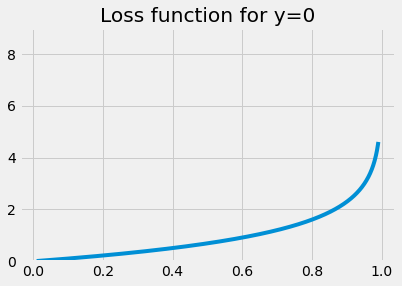

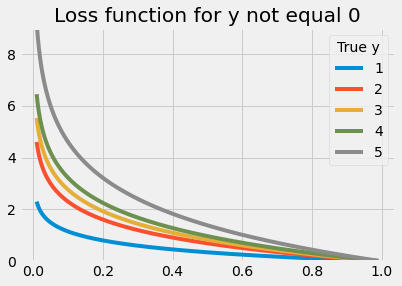

In [15]:
y_pred = np.linspace(0.01, 0.99, 1000)
loss_0 = -np.log(1 - y_pred)
plt.plot(y_pred, loss_0)
plt.title("Loss function for y=0")
plt.ylim((0, 9))
plt.show()

loss_base = -np.log(y_pred)
loss_1 = 0.5 * loss_base
loss_2 = loss_base
loss_3 = 1.2 * loss_base
loss_4 = 1.4*loss_base
loss_5 = 2*loss_base
plt.plot(y_pred, loss_1, label="1")
plt.plot(y_pred, loss_2, label="2")
plt.plot(y_pred, loss_3, label="3")
plt.plot(y_pred, loss_4, label="4")
plt.plot(y_pred, loss_5, label="5")
plt.ylim((0, 9))
plt.title("Loss function for y not equal 0")
plt.legend(title="True y");

Accuracy: 91.59
F-1 score: 0.1148


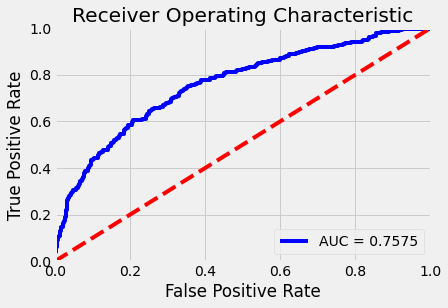

0.7575078276570814

In [35]:
impute_vectorize = Pipeline([
    ("imputer", Imputer), ("vectorizer", Vectorizer)
])

split_vectorize = Pipeline([
    ("splitter", Splitter), ("vectorizer", Vectorizer)
])

column_transformer = ColumnTransformer([
       ("statement_vectorizer", Vectorizer ,"statement"),
        ("subject_vectorizer", split_vectorize, "subject"),
        ("job", impute_vectorize, "speaker_job"),
        ("state", impute_vectorize, "state"),
        ("party", impute_vectorize, "party"),
        ("context", impute_vectorize, "context")
    ])


loss_weights = (0.9, 1, 1.1, 1.21, 1.33)


pipeline = Pipeline([
    ("get_features", column_transformer),
    ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0.0, l2=0.0002, max_iter=1000, tol=1e-5, plot_loss=False))
])

pipeline.fit(x_train, y_train_multi);
evaluate(pipeline, x_test, y_test)

In [36]:
rs = np.linspace(0.9, 1.3, 200)
roc_aucs = []
for r in tqdm(rs):
    loss_weights = (1/r, 1, r, r**2, r**3)


    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-6, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

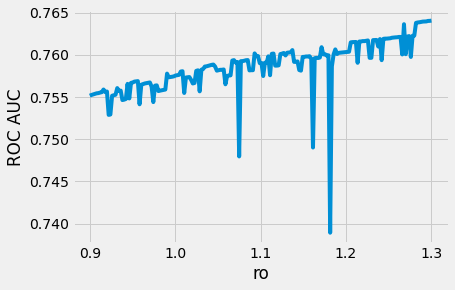

In [37]:
plt.plot(rs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("ro");

In [38]:
rs = np.linspace(1, 3, 100)
roc_aucs = []
for r in tqdm(rs):
    loss_weights = (1/r, 1, r, r**2, r**3)


    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-5, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

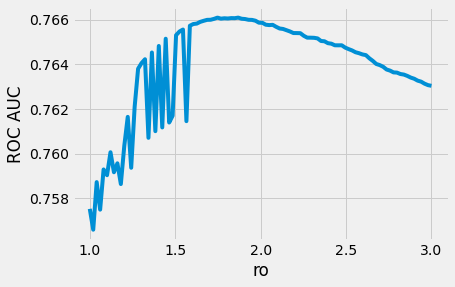

In [39]:
plt.plot(rs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("ro");

In [42]:
x_train, x_test, y_train_multi, y_test_multi = train_test_split(data.drop("label", axis=1), get_multi_label(data), random_state=41)
y_train = label_from_multi(y_train_multi)
y_test = label_from_multi(y_test_multi)

rs = np.linspace(0.9, 4, 200)
roc_aucs = []
for r in tqdm(rs):
    loss_weights = (1/r, 1, r, r**2, r**3)


    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-6, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

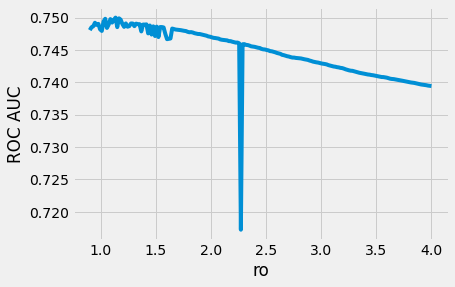

In [43]:
plt.plot(rs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("ro")
plt.savefig("img/auc_vs_ro_seed_41.png")

In [44]:
rs[np.argmax(roc_aucs)]

1.1336683417085427

In [45]:
x_train, x_test, y_train_multi, y_test_multi = train_test_split(data.drop("label", axis=1), get_multi_label(data), random_state=40)
y_train = label_from_multi(y_train_multi)
y_test = label_from_multi(y_test_multi)

rs = np.linspace(0.9, 4, 200)
roc_aucs = []
for r in tqdm(rs):
    loss_weights = (1/r, 1, r, r**2, r**3)


    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-4, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

In [46]:
rs[np.argmax(roc_aucs)]

1.850251256281407

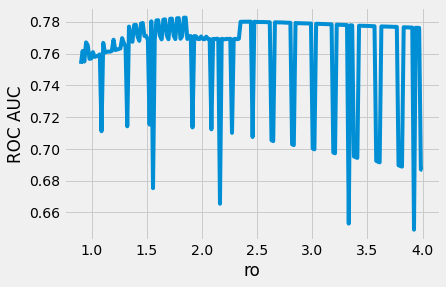

In [47]:
plt.plot(rs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("ro")
plt.savefig("img/auc_vs_ro_seed_40.png")

In [53]:
gs = np.linspace(-0.1, 5, 100)
roc_aucs = []
for g in tqdm(gs):
    loss_weights = (0.1, 1, 1 + g, 1 + 2*g, 1+3*g)

    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-5, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

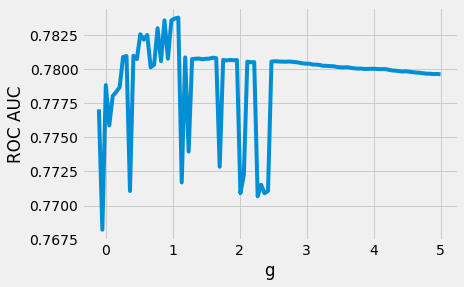

In [54]:
plt.plot(gs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("g")
plt.savefig("img/auc_vs_g_with_zero.png")

In [ ]:
gs = np.linspace(-0.2, 0.99, 100)
roc_aucs = []
for g in tqdm(gs):
    loss_weights = (1-g, 1, 1 + g, 1 + 2*g, 1+3*g)

    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-5, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

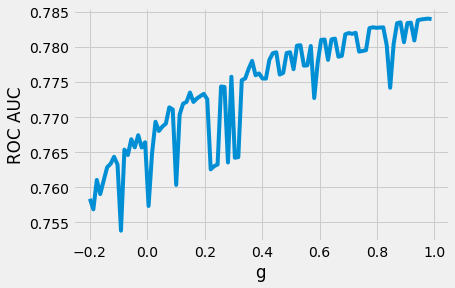

In [51]:
plt.plot(gs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("g")
plt.savefig("img/auc_vs_g.png")

In [67]:
x_train, x_test, y_train_multi, y_test_multi = train_test_split(data.drop("label", axis=1), get_multi_label(data), random_state=2)
y_train = label_from_multi(y_train_multi)
y_test = label_from_multi(y_test_multi)

gs = np.linspace(0.5, 1.1, 20)
roc_aucs = []
for g in tqdm(gs):
    loss_weights = (1-g, 1, 1 + g, 1 + 2*g, 1+3*g)

    pipeline = Pipeline([
        ("get_features", column_transformer),
        ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-5, plot_loss=False, verbose=False))
    ])

    pipeline.fit(x_train, y_train_multi);
    roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))

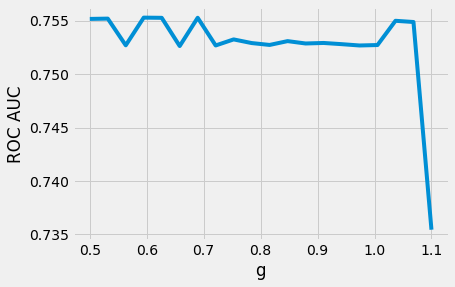

In [68]:
plt.plot(gs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("g");

0



1



2



3



4



5



6



7



8



9


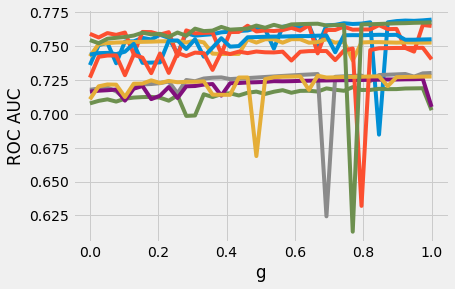

In [74]:
scores = []

for rs in trange(10):
    print(rs)
    x_train, x_test, y_train_multi, y_test_multi = train_test_split(data.drop("label", axis=1), get_multi_label(data), random_state=rs)
    y_train = label_from_multi(y_train_multi)
    y_test = label_from_multi(y_test_multi)

    gs = np.linspace(0., 1, 40)
    roc_aucs = []
    for g in tqdm(gs):
        loss_weights = (1 - g, 1, 1 + g, 1 + 2*g, 1+3*g)

        pipeline = Pipeline([
            ("get_features", column_transformer),
            ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-5, plot_loss=False, verbose=False))
        ])

        pipeline.fit(x_train, y_train_multi);
        roc_aucs.append(evaluate(pipeline, x_test, y_test, verbose=False))
    plt.plot(gs, roc_aucs)
    plt.ylabel("ROC AUC")
    plt.xlabel("g")
    scores.append(roc_aucs)

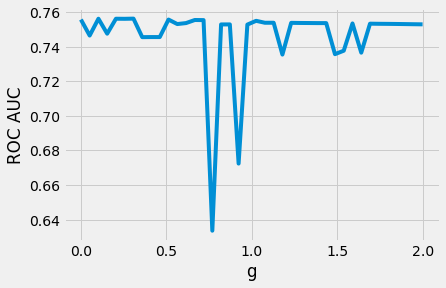

In [72]:
plt.plot(gs, roc_aucs)
plt.ylabel("ROC AUC")
plt.xlabel("g");

---
#### Additional tweaks

In [ ]:
people = data.groupby("speaker").size().sort_values(ascending=False).reset_index().reset_index()
lies = [get_label(data.loc[data.speaker == name]).mean() * 100 for name in people.speaker]
people["lies"] = lies
people.columns = ["index", "speaker", "count", "lies"]

colname = "speaker_job"
jobs = data.groupby(colname).size().sort_values(ascending=False).reset_index().reset_index()
lies = [get_label(data.loc[data[colname] == name]).mean() * 100 for name in jobs[colname]]
jobs["lies"] = lies
jobs.columns = ["index", colname, "count", "lies"]

def encode(name, colname, common, *, top=40):
    encoding = np.zeros(top + 1)
    if name in common[:top][colname].values:
        idx = common.loc[common[colname]==name, "index"].values[0]
        encoding[idx] = 1
    else:
        encoding[top] = 1
    return encoding

def encode_column(x_array, colname, most_popular, *, top=50):
    if type(x_array) == pd.core.series.Series:
        x_array = x_array.values
    ret = []
    for name in x_array:
        ret.append(encode(name, colname, most_popular, top=top))
    return np.stack(ret)

def encode_speaker(x_array):
    return encode_column(x_array, "speaker", people, top=20)

def encode_job(x_array):
    return encode_column(x_array, "speaker_job", jobs, top=20)


from sklearn.preprocessing import FunctionTransformer
SpeakerEncoder = FunctionTransformer(encode_speaker)
JobEncoder = FunctionTransformer(encode_job)

In [ ]:
impute_vectorize = Pipeline([
    ("imputer", Imputer), ("vectorizer", Vectorizer)
])

split_vectorize = Pipeline([
    ("splitter", Splitter), ("vectorizer", Vectorizer)
])

impute_encode_job = Pipeline([
    ("imputer", Imputer), ("vectorizer", JobEncoder)
])

column_transformer = ColumnTransformer([
       ("statement_vectorizer", Vectorizer ,"statement"),
        ("subject_vectorizer", split_vectorize, "subject"),
        ("speaker_encoder", SpeakerEncoder, "speaker"),
        ("job", impute_encode_job, "speaker_job"),
        ("state", impute_vectorize, "state"),
        ("party", impute_vectorize, "party"),
        ("context", impute_vectorize, "context")
    ])


pipeline = Pipeline([
    ("get_features", column_transformer),
    ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=1e-6, l2=0.0002, max_iter=1000, tol=1e-6, plot_loss=True))
])

pipeline.fit(x_train, y_train_multi);
evaluate(pipeline, x_test, y_test)

---
#### Other experiments

Accuracy: 92.17
F-1 score: 0.0905


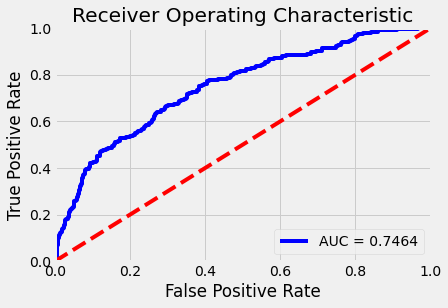

0.7463813746278566

In [98]:
x_train, x_test, y_train_multi, y_test_multi = train_test_split(data.drop("label", axis=1), get_multi_label(data), random_state=22)
y_train = label_from_multi(y_train_multi)
y_test = label_from_multi(y_test_multi)

g = 0.6

loss_weights = (1-g, 1, 1+g, 1+2*g, 1+3*g)
# loss_weights = (0.1, 0.9, 1.5, 2.2, 3)

pipeline = Pipeline([
    ("get_features", column_transformer),
    ("predict", WeightedLogisticRegression(loss_weights=loss_weights, lr=0.1, l1=0, l2=0.0002, max_iter=1000, tol=1e-6, plot_loss=False, verbose=False))
])

pipeline.fit(x_train, y_train_multi);
evaluate(pipeline, x_test, y_test)